# Fake News Classification: Model Results Summary

Generate presentation-ready charts and analysis from saved model results.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json

# Import model evaluation functions
from model_eval import (
    load_all_model_results,
    plot_best_models_comparison,
    plot_model_accuracy_comparison,
    generate_presentation_summary,
    create_model_performance_table
)

print('Libraries imported successfully!')

Libraries imported successfully!


In [2]:
# Load all saved model results
print('Loading model results...')
models = load_all_model_results()

if models:
    print(f'Loaded {len(models)} model results')
    for model_id, data in models.items():
        name = data.get('display_name', model_id)
        acc = data.get('accuracy', 0) * 100
        print(f'  {name}: {acc:.2f}% accuracy')
else:
    print('No model results found. Run individual notebooks first.')

Loading model results...
Loaded 11 model results
Loaded 11 model results
  Model 6b: GloVe + Mean Pooling + Logistic Regression: 88.96% accuracy
  Full BERT Fine-tuned: 98.74% accuracy
  Universal Sentence Encoder + Logistic Regression: 92.45% accuracy
  Model 2: TF-IDF + GridSearchCV: 95.45% accuracy
  Logistic Regression: 93.99% accuracy
  Baseline LogisticRegression: 92.90% accuracy
  Linear SVC: 93.36% accuracy
  Logistic Regression 4: 95.01% accuracy
  Naive Bayes: 92.77% accuracy
  Simple BERT: 95.87% accuracy
  GloVe + Pooling + Logistic Regression: 88.96% accuracy


## Executive Summary Chart

Generate a presentation-ready comparison of our best performing models:

Generating executive summary chart...


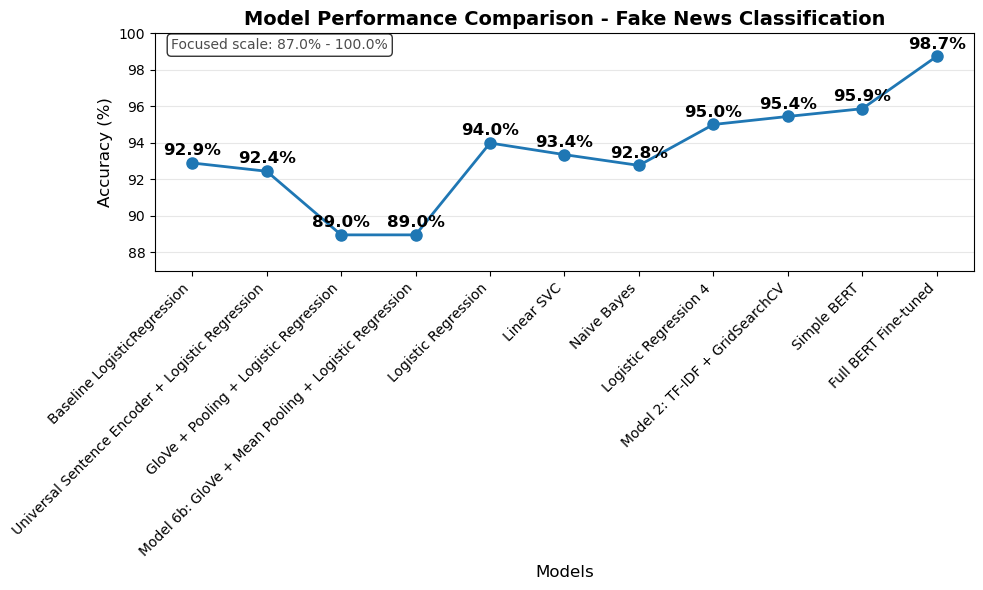

Chart saved to presentation_assets/executive_summary.png
Y-axis range: 87.0% - 100.0% (Range: 13.0 percentage points)


In [3]:
# Define the order we want for presentation (best models first)
presentation_order = [
    'baseline_lr',                    # Traditional ML baseline
    'Model6a_USE_LR',                 # Universal Sentence Encoder
    'Model6a_GloVe_Pooling_LR',       # GloVe embeddings + Pooling
    'model6a_use_lr',                 # Alternative USE implementation
    'model6b_glove_pooling_lr',       # Alternative GloVe implementation
    'NLPModel1_LoR',                  # Logistic Regression variant 1
    'NLPModel2_SVC',                  # Support Vector Classifier
    'NLPModel3_ND',                   # Naive Bayes (ND = Naive?)
    'NLPModel4_LoR',                  # Logistic Regression variant 2
    'model2_pipeline_selection',      # Pipeline selection experiment
    'simple_bert',                    # Strong BERT baseline
    'full_bert_model'                 # Best performing model
]
# Generate the chart with our preferred order
if models:
    print('Generating executive summary chart...')
    plot_best_models_comparison(
        models_dict=models,
        save_path="presentation_assets/executive_summary.png",
        title="Model Performance Comparison - Fake News Classification",
        chart_type="line",
        order=presentation_order,
        filter_only=True  # Only show the 5 key models for presentation
    )
else:
    print('Cannot generate chart - no results available')

## Comprehensive Model Analysis

### Performance Overview Table

In [4]:
# Create a comprehensive performance table
if models:
    print("=== MODEL PERFORMANCE SUMMARY ===")
    print()
    performance_table = create_model_performance_table(
        models_dict=models, 
        format_type="markdown",
        order=presentation_order,
        filter_only=True  # Only show the 5 key models for presentation
    )
    print(performance_table)
    
    # Save to file for easy access
    Path('presentation_assets').mkdir(exist_ok=True)
    with open('presentation_assets/performance_table.md', 'w') as f:
        f.write(performance_table)
    print('\nTable saved to presentation_assets/performance_table.md')
else:
    print('Cannot generate table - no results available')

=== MODEL PERFORMANCE SUMMARY ===

| Model | Accuracy | Training Time | Architecture/Setup |
|-------|----------|---------------|-------------|
| Baseline LogisticRegression | 92.90% | 0.0 min | LogisticRegression with CountVectorizer (10k features) |
| Universal Sentence Encoder + Logistic Regression | 92.45% | 0.0 min | Logistic Regression with Universal Sentence Encoder embeddings (512-dim) |
| GloVe + Pooling + Logistic Regression | 88.96% | 0.0 min | Logistic Regression with GloVe-6B-100d embeddings (400K vocab) and mean pooling |
| Model 6b: GloVe + Mean Pooling + Logistic Regression | 88.96% | 0.0 min | Logistic Regression with GloVe embeddings and mean pooling |
| Logistic Regression | 93.99% | 0.0 min | Logistic Regression with TF-IDF Vectorization |
| Linear SVC | 93.36% | 0.0 min | Linear SVC with TF-IDF Vectorization |
| Naive Bayes | 92.77% | 0.0 min | Naive Bayes with TF-IDF Vectorization |
| Logistic Regression 4 | 95.01% | 0.0 min | Logistic Regression 4 + TF-IDF Vector

### Detailed Model Comparison Charts

Generating detailed model comparison charts...


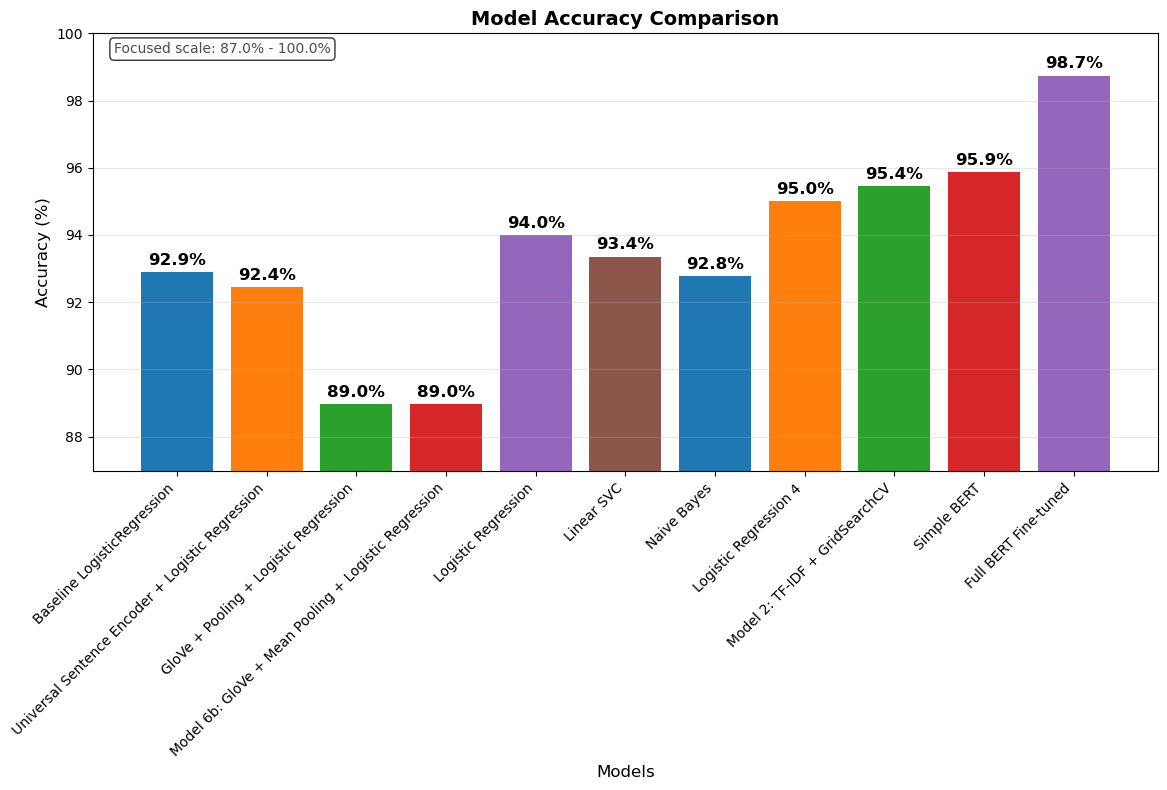

Chart saved to presentation_assets/detailed_model_comparison.png
Accuracy y-axis range: 87.0% - 100.0% (Range: 13.0 percentage points)


In [5]:
# Generate detailed comparison charts
if models:
    print('Generating detailed model comparison charts...')
    plot_model_accuracy_comparison(
        models_dict=models,
        save_path="presentation_assets/detailed_model_comparison.png",
        order=presentation_order,
        filter_only=True  # Only show the 5 key models for presentation
    )
else:
    print('Cannot generate chart - no results available')

## Model Category Analysis

Let's analyze our models by category to understand what approaches work best:

In [6]:
if models:
    # Categorize models by approach
    model_categories = {
        'Deep Learning (BERT)': ['full_bert_model', 'simple_bert'],
        'Traditional ML': ['baseline_lr', 'NLPModel1_LoR', 'NLPModel2_SVC', 'NLPModel3_ND', 'NLPModel4_LoR'],
        'Embeddings-based': ['Model6a_USE_LR', 'Model6a_GloVe_Pooling_LR', 'model6a_use_lr', 'model6b_glove_pooling_lr'],
        'Pipeline Experiments': ['model2_pipeline_selection']
    }

    # Calculate average accuracy by category
    category_performance = {}
    for category, model_ids in model_categories.items():
        accuracies = []
        for model_id in model_ids:
            if model_id in models:
                accuracies.append(models[model_id].get('accuracy', 0) * 100)
        
        if accuracies:
            category_performance[category] = {
                'avg_accuracy': np.mean(accuracies),
                'max_accuracy': np.max(accuracies),
                'min_accuracy': np.min(accuracies),
                'count': len(accuracies)
            }

    print("=== PERFORMANCE BY MODEL CATEGORY ===")
    print()
    for category, stats in category_performance.items():
        print(f"{category}:")
        print(f"  Average Accuracy: {stats['avg_accuracy']:.2f}%")
        print(f"  Best Model: {stats['max_accuracy']:.2f}%")
        print(f"  Worst Model: {stats['min_accuracy']:.2f}%")
        print(f"  Models Tested: {stats['count']}")
        print()
else:
    print('Cannot analyze categories - no results available')

=== PERFORMANCE BY MODEL CATEGORY ===

Deep Learning (BERT):
  Average Accuracy: 97.31%
  Best Model: 98.74%
  Worst Model: 95.87%
  Models Tested: 2

Traditional ML:
  Average Accuracy: 93.60%
  Best Model: 95.01%
  Worst Model: 92.77%
  Models Tested: 5

Embeddings-based:
  Average Accuracy: 90.12%
  Best Model: 92.45%
  Worst Model: 88.96%
  Models Tested: 3

Pipeline Experiments:
  Average Accuracy: 95.45%
  Best Model: 95.45%
  Worst Model: 95.45%
  Models Tested: 1



## Training Efficiency Analysis

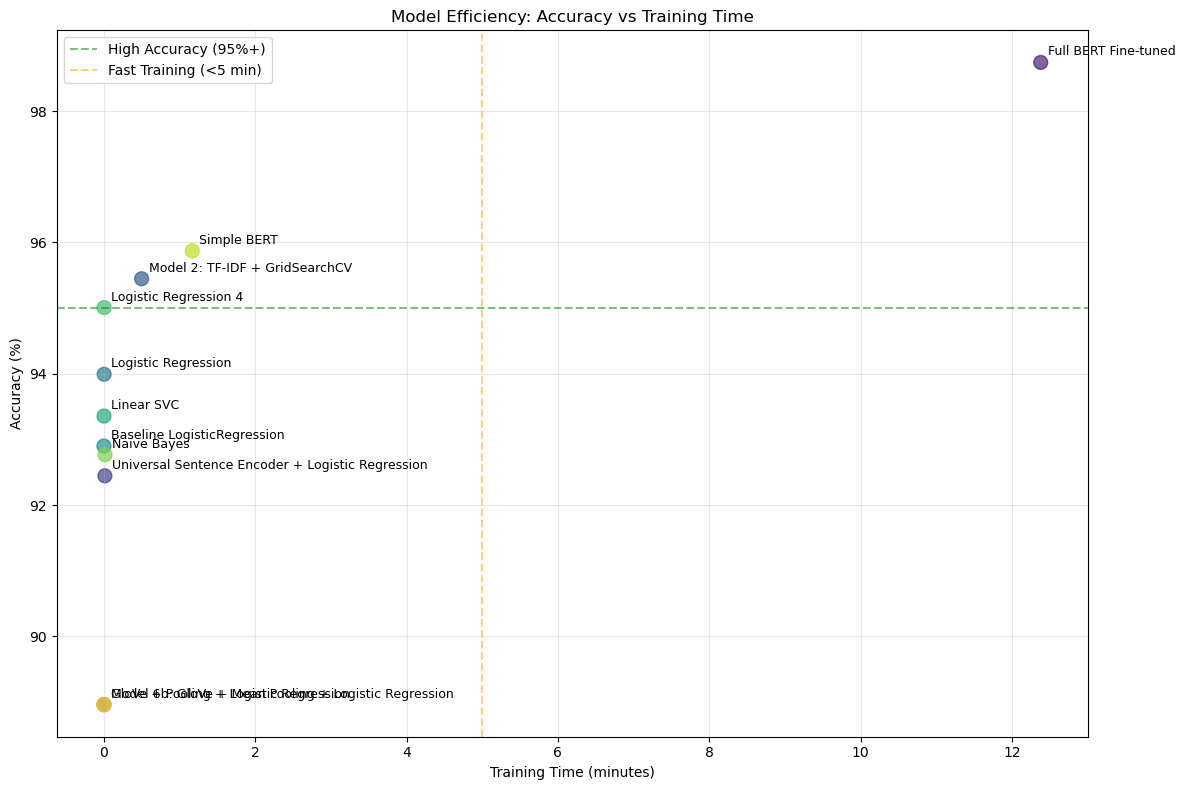

Training efficiency analysis complete!


In [7]:
if models:
    # Analyze training time vs accuracy trade-offs
    training_times = []
    accuracies = []
    model_names = []

    for model_id, data in models.items():
        if 'training_time_minutes' in data and data['training_time_minutes'] > 0:
            training_times.append(data['training_time_minutes'])
            accuracies.append(data['accuracy'] * 100)
            model_names.append(data.get('display_name', model_id))

    if training_times:  # Only create chart if we have training time data
        # Create efficiency scatter plot
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(training_times, accuracies, s=100, alpha=0.7, 
                            c=range(len(training_times)), cmap='viridis')

        # Add model name labels
        for i, name in enumerate(model_names):
            plt.annotate(name, (training_times[i], accuracies[i]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)

        plt.xlabel('Training Time (minutes)')
        plt.ylabel('Accuracy (%)')
        plt.title('Model Efficiency: Accuracy vs Training Time')
        plt.grid(True, alpha=0.3)

        # Add efficiency zones
        plt.axhline(y=95, color='green', linestyle='--', alpha=0.5, label='High Accuracy (95%+)')
        plt.axvline(x=5, color='orange', linestyle='--', alpha=0.5, label='Fast Training (<5 min)')

        plt.legend()
        plt.tight_layout()
        
        # Save the chart
        Path('presentation_assets').mkdir(exist_ok=True)
        plt.savefig('presentation_assets/efficiency_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("Training efficiency analysis complete!")
    else:
        print("No training time data available for efficiency analysis")
else:
    print('Cannot analyze efficiency - no results available')

## Deep Dive: Best Model Analysis

In [8]:
if models:
    # Identify and analyze our best performing model
    best_model_id = max(models.items(), key=lambda x: x[1].get('accuracy', 0))[0]
    best_model_data = models[best_model_id]

    print("=== BEST MODEL DEEP DIVE ===")
    print()
    print(f"Model: {best_model_data.get('display_name', best_model_id)}")
    print(f"Architecture: {best_model_data.get('model_architecture', 'Not specified')}")
    print(f"Accuracy: {best_model_data.get('accuracy', 0) * 100:.2f}%")
    print(f"Training Time: {best_model_data.get('training_time_minutes', 0):.2f} minutes")

    # Show hyperparameters if available
    if 'hyperparameters' in best_model_data:
        print("\nHyperparameters:")
        for key, value in best_model_data['hyperparameters'].items():
            print(f"  {key}: {value}")

    # Show dataset info if available
    if 'dataset_info' in best_model_data:
        print("\nDataset Information:")
        for key, value in best_model_data['dataset_info'].items():
            print(f"  {key}: {value}")

    # Show classification report if available
    if 'classification_report' in best_model_data:
        print("\nClassification Report:")
        report = best_model_data['classification_report']
        if isinstance(report, dict) and '0' in report and '1' in report:
            print(f"  Precision (Class 0): {report.get('0', {}).get('precision', 0):.3f}")
            print(f"  Recall (Class 0): {report.get('0', {}).get('recall', 0):.3f}")
            print(f"  F1-Score (Class 0): {report.get('0', {}).get('f1-score', 0):.3f}")
            print(f"  Precision (Class 1): {report.get('1', {}).get('precision', 0):.3f}")
            print(f"  Recall (Class 1): {report.get('1', {}).get('recall', 0):.3f}")
            print(f"  F1-Score (Class 1): {report.get('1', {}).get('f1-score', 0):.3f}")
else:
    print('Cannot analyze best model - no results available')

=== BEST MODEL DEEP DIVE ===

Model: Full BERT Fine-tuned
Architecture: BERT-base-uncased fine-tuned (109,483,778 parameters)
Accuracy: 98.74%
Training Time: 12.38 minutes

Hyperparameters:
  bert_model: bert-base-uncased
  max_length: 39
  num_train_epochs: 3
  per_device_train_batch_size: 16
  learning_rate: 5e-05
  weight_decay: 0.01
  warmup_steps: 500
  early_stopping_patience: 2

Dataset Information:
  training_samples: 27320
  validation_samples: 6831
  max_sequence_length: 39
  total_parameters: 109483778
  vocab_size: 30522
  device: mps


## Key Insights and Recommendations

In [9]:
if models:
    # Generate presentation summary
    summary = generate_presentation_summary(models)

    print("=== KEY INSIGHTS FOR PRESENTATION ===")
    print()
    print(f"🏆 Best Model: {summary['best_model_name']}")
    print(f"📊 Best Accuracy: {summary['best_accuracy']}")
    print(f"🔬 Total Models Tested: {summary['total_models_tested']}")
    print(f"📈 Improvement Over Baseline: {summary['accuracy_improvement']}")
    print()

    print("=== RANKING OF ALL MODELS ===")
    print()
    for rank, (model_id, data) in enumerate(summary['model_ranking'], 1):
        name = data.get('display_name', model_id)
        acc = data.get('accuracy', 0) * 100
        time_str = f"{data.get('training_time_minutes', 0):.1f}m"
        print(f"{rank:2d}. {name:<35} {acc:6.2f}% ({time_str})")
else:
    print('Cannot generate insights - no results available')

=== KEY INSIGHTS FOR PRESENTATION ===

🏆 Best Model: Full BERT Fine-tuned
📊 Best Accuracy: 98.74%
🔬 Total Models Tested: 11
📈 Improvement Over Baseline: 9.8 percentage points

=== RANKING OF ALL MODELS ===

 1. Full BERT Fine-tuned                 98.74% (12.4m)
 2. Simple BERT                          95.87% (1.2m)
 3. Model 2: TF-IDF + GridSearchCV       95.45% (0.5m)
 4. Logistic Regression 4                95.01% (0.0m)
 5. Logistic Regression                  93.99% (0.0m)
 6. Linear SVC                           93.36% (0.0m)
 7. Baseline LogisticRegression          92.90% (0.0m)
 8. Naive Bayes                          92.77% (0.0m)
 9. Universal Sentence Encoder + Logistic Regression  92.45% (0.0m)
10. Model 6b: GloVe + Mean Pooling + Logistic Regression  88.96% (0.0m)
11. GloVe + Pooling + Logistic Regression  88.96% (0.0m)


## Business Recommendations

In [10]:
if models:
    print("=== BUSINESS RECOMMENDATIONS ===")
    print()

    # Analyze model performance ranges
    accuracies = [data.get('accuracy', 0) * 100 for data in models.values()]
    min_acc, max_acc, avg_acc = min(accuracies), max(accuracies), np.mean(accuracies)

    print(f"Model Performance Range: {min_acc:.1f}% - {max_acc:.1f}% (Average: {avg_acc:.1f}%)")
    print()

    print("📋 DEPLOYMENT RECOMMENDATIONS:")
    print()

    if max_acc >= 95:
        print("✅ PRODUCTION READY: Best model achieves >95% accuracy")
        print("   → Recommended for deployment in production systems")
        print("   → Consider A/B testing against current solution")
    else:
        print("⚠️  NEEDS IMPROVEMENT: Best model <95% accuracy")
        print("   → Consider additional data collection")
        print("   → Explore ensemble methods")

    print()
    print("🔄 OPERATIONAL CONSIDERATIONS:")
    print()

    # Find fastest accurate model (>90% accuracy, <5 min training)
    fast_accurate_models = []
    for model_id, data in models.items():
        acc = data.get('accuracy', 0) * 100
        time_min = data.get('training_time_minutes', 0)
        if acc >= 90 and time_min <= 5 and time_min > 0:
            fast_accurate_models.append((data.get('display_name', model_id), acc, time_min))

    if fast_accurate_models:
        print("⚡ FAST & ACCURATE OPTIONS (>90% accuracy, <5min training):")
        for name, acc, time_min in fast_accurate_models:
            print(f"   → {name}: {acc:.1f}% in {time_min:.1f} minutes")
    else:
        print("⏱️  No models found with >90% accuracy trained in <5 minutes")
        print("   → Consider computational resource planning for deployment")

    print()
    print("📊 MONITORING RECOMMENDATIONS:")
    print("   → Set up accuracy monitoring with alerts below 90%")
    print("   → Track prediction confidence scores")
    print("   → Implement human-in-the-loop for low-confidence predictions")
    print("   → Regular model retraining schedule (monthly/quarterly)")
else:
    print('Cannot generate recommendations - no results available')

=== BUSINESS RECOMMENDATIONS ===

Model Performance Range: 89.0% - 98.7% (Average: 93.5%)

📋 DEPLOYMENT RECOMMENDATIONS:

✅ PRODUCTION READY: Best model achieves >95% accuracy
   → Recommended for deployment in production systems
   → Consider A/B testing against current solution

🔄 OPERATIONAL CONSIDERATIONS:

⚡ FAST & ACCURATE OPTIONS (>90% accuracy, <5min training):
   → Universal Sentence Encoder + Logistic Regression: 92.4% in 0.0 minutes
   → Model 2: TF-IDF + GridSearchCV: 95.4% in 0.5 minutes
   → Logistic Regression: 94.0% in 0.0 minutes
   → Baseline LogisticRegression: 92.9% in 0.0 minutes
   → Linear SVC: 93.4% in 0.0 minutes
   → Logistic Regression 4: 95.0% in 0.0 minutes
   → Naive Bayes: 92.8% in 0.0 minutes
   → Simple BERT: 95.9% in 1.2 minutes

📊 MONITORING RECOMMENDATIONS:
   → Set up accuracy monitoring with alerts below 90%
   → Track prediction confidence scores
   → Implement human-in-the-loop for low-confidence predictions
   → Regular model retraining schedule

## Export Results for Presentation

In [11]:
if models:
    # Calculate metrics for export
    accuracies = [data.get('accuracy', 0) * 100 for data in models.values()]
    min_acc, max_acc = min(accuracies), max(accuracies)
    summary = generate_presentation_summary(models)
    
    # Save key metrics for presentation slides
    presentation_metrics = {
        'total_models': len(models),
        'best_accuracy': f"{max_acc:.1f}%",
        'accuracy_range': f"{min_acc:.1f}% - {max_acc:.1f}%",
        'best_model': summary['best_model_name'],
        'improvement': summary['accuracy_improvement'],
        'models_by_performance': [
            {
                'rank': rank,
                'name': data.get('display_name', model_id),
                'accuracy': f"{data.get('accuracy', 0) * 100:.2f}%",
                'training_time': f"{data.get('training_time_minutes', 0):.1f}m"
            }
            for rank, (model_id, data) in enumerate(summary['model_ranking'], 1)
        ]
    }

    # Ensure directory exists
    Path('presentation_assets').mkdir(exist_ok=True)
    
    # Save to JSON for easy access in presentation
    with open('presentation_assets/key_metrics.json', 'w') as f:
        json.dump(presentation_metrics, f, indent=2)

    print("📁 Results exported to presentation_assets/")
    print("   → key_metrics.json: Summary statistics")
    print("   → executive_summary.png: Main comparison chart")
    print("   → detailed_model_comparison.png: Detailed analysis")
    print("   → efficiency_analysis.png: Training time vs accuracy")
    print("   → performance_table.md: Comprehensive model table")
    print()
    print("🎯 Ready for presentation preparation!")
else:
    print('Cannot export results - no model data available')

📁 Results exported to presentation_assets/
   → key_metrics.json: Summary statistics
   → executive_summary.png: Main comparison chart
   → detailed_model_comparison.png: Detailed analysis
   → efficiency_analysis.png: Training time vs accuracy
   → performance_table.md: Comprehensive model table

🎯 Ready for presentation preparation!
